In [1]:
import numpy as np
import numpy.fft as fp
import matplotlib.pyplot as plt
from PIL import Image

import sys
sys.path.append("/home/jovyan/")

from imtools import load_img, show_img
from sigtools import *

img = load_img('oriental_pearl.jpg')

In [2]:
def signal_to_noise(data):
    mean = np.mean(data)
    std = np.std(data)
    
    return mean / std
    

(<matplotlib.image.AxesImage at 0x7f9f64083d30>, (-0.5, 349.5, 349.5, -0.5))

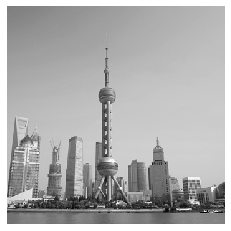

In [3]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255), plt.axis('off')

In [4]:
snr = signal_to_noise(img)
print("SNR for the original Image: ", snr)

SNR for the original Image:  4.0049915960163505


(<matplotlib.image.AxesImage at 0x7f9f63b4c1d0>, (-0.5, 349.5, 349.5, -0.5))

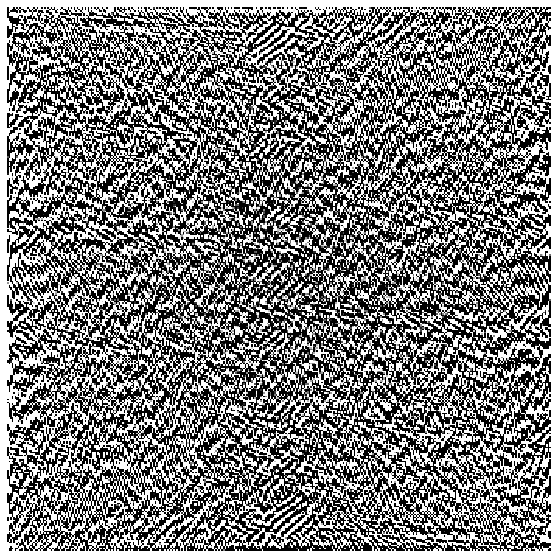

In [5]:
freq = fp.fft2(img)
freq_img = freq.imag
plt.figure(figsize=(10,10))
plt.imshow(freq_img, cmap='gray', vmin=0, vmax=255), plt.axis('off')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


(-0.5, 349.5, 349.5, -0.5)

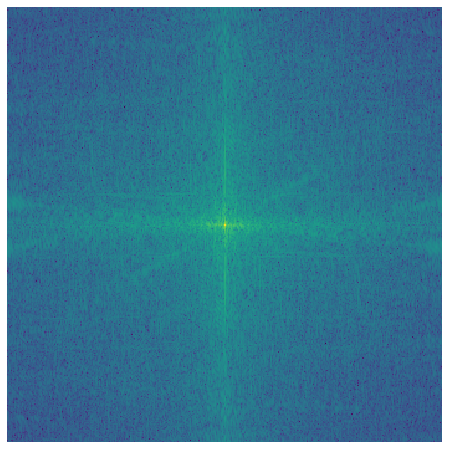

In [9]:
freq_2 = fp.fftshift(freq)
plt.figure(figsize=(8,8))
plt.imshow((20*np.log10(0.1 + freq_2)).astype(int)) 
plt.axis('off')

In [7]:
img_freq = fp.ifft2(freq).real

SNR for the Image after reconstrucion:  4.0049915960163505


(<matplotlib.image.AxesImage at 0x7f9f63b02198>, (-0.5, 349.5, 349.5, -0.5))

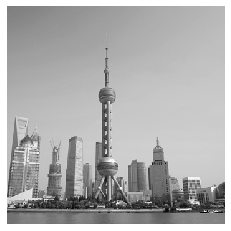

In [8]:
snr = signal_to_noise(img_freq)
print("SNR for the Image after reconstrucion: ", snr)
plt.imshow(img_freq, cmap='gray', vmin=0, vmax=255), plt.axis('off')